In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, auc
from funcs_plotter import double_roc, single_roc, getEfficiency, \
                            getPurity, plotChart, plot_confusion_matrix, \
                            plot_roc_curve_custom, plot_roc_compare


# Plot ROC curves superimposed

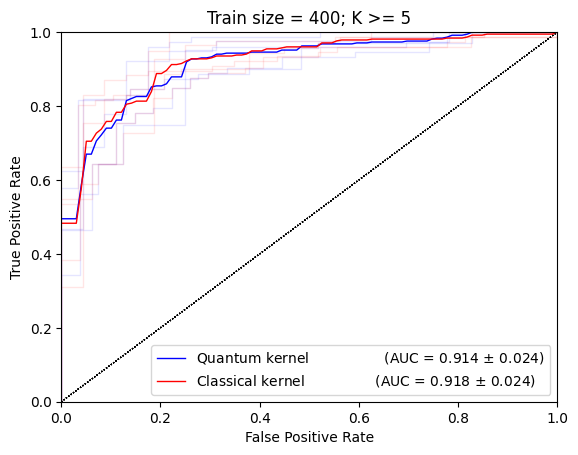

In [4]:
#totalSizes = [100, 500, 1000, 5000, 10000, 50000]
totalSizes = [500]
#k_values = [5, 10, 20]
k_values = [5]
for totalSize in totalSizes:
    for k_value in k_values:
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        plot_roc_compare(path_quant, path_class)

# Single and two roc curves + conf mtx

In [9]:
totalSizes = [5000]
k_values = [20]
foldIdx = 0
for totalSize in totalSizes:
    for k_value in k_values:
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'        
        df_qm = pd.read_pickle(path_quant.format(foldIdx))
        df_cl = pd.read_pickle(path_class.format(foldIdx))


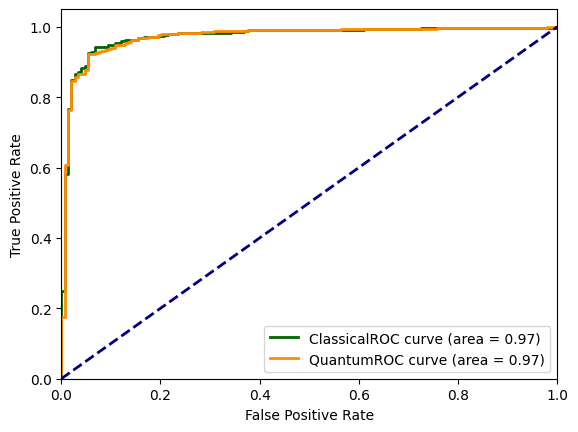

In [10]:
double_roc(df_cl, 'Classical', df_qm, 'Quantum')

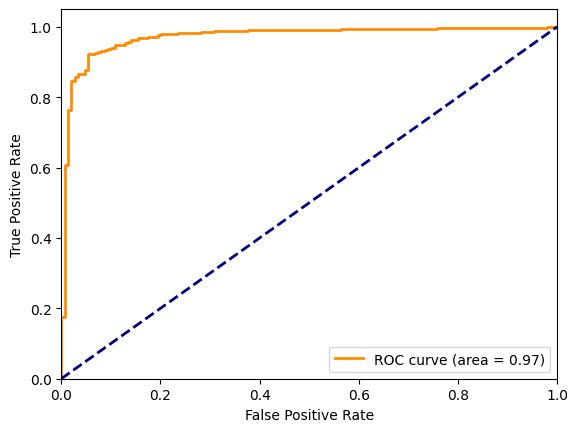

In [11]:
single_roc(df_qm,'')

In [ ]:
#eff_class = {}
#purity_class = {}
#eff_quant = {}
#purity_quant = {}
#trainSizes = [50, 100, 500, 1000, 5000, 10000, 50000]
#for trainSize in trainSizes:
#    df_class = getDataset(outputPath='output/', classical=True, trainSize=trainSize)
#    df_quant = getDataset(outputPath='output/', classical=False, trainSize=trainSize)
#    eff_class[trainSize] = getEfficiency(df_class)
#    eff_quant[trainSize] = getEfficiency(df_quant)
#    purity_class[trainSize] = getPurity(df_class)
#    purity_quant[trainSize] = getPurity(df_quant)
    

In [ ]:
#plotChart(dictClass=eff_class, dictQuant=eff_quant, yLabel='efficiency')

In [ ]:
#plotChart(dictClass=purity_class, dictQuant=purity_quant, yLabel='purity')

In [5]:
plot_confusion_matrix(df_qm['trueLabels'], df_qm['predictedLabels'], normalize_by_yTrue=True)


NameError: name 'df_qm' is not defined

[[0.94630872 0.05369128]
 [0.08343126 0.91656874]]


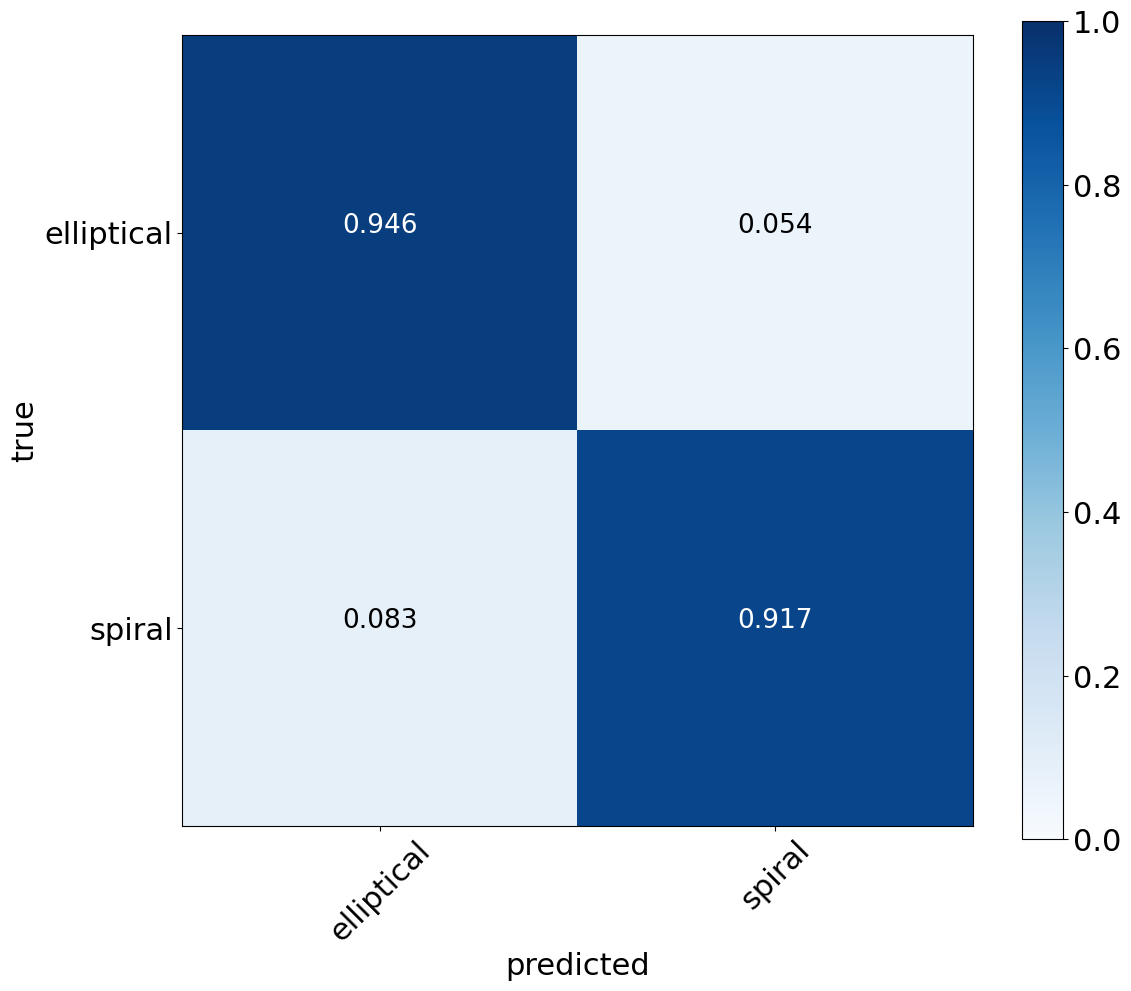

In [13]:
plot_confusion_matrix(df_cl['trueLabels'], df_cl['predictedLabels'], normalize_by_yTrue=True)


[[0.65581395 0.01019108]
 [0.34418605 0.98980892]]


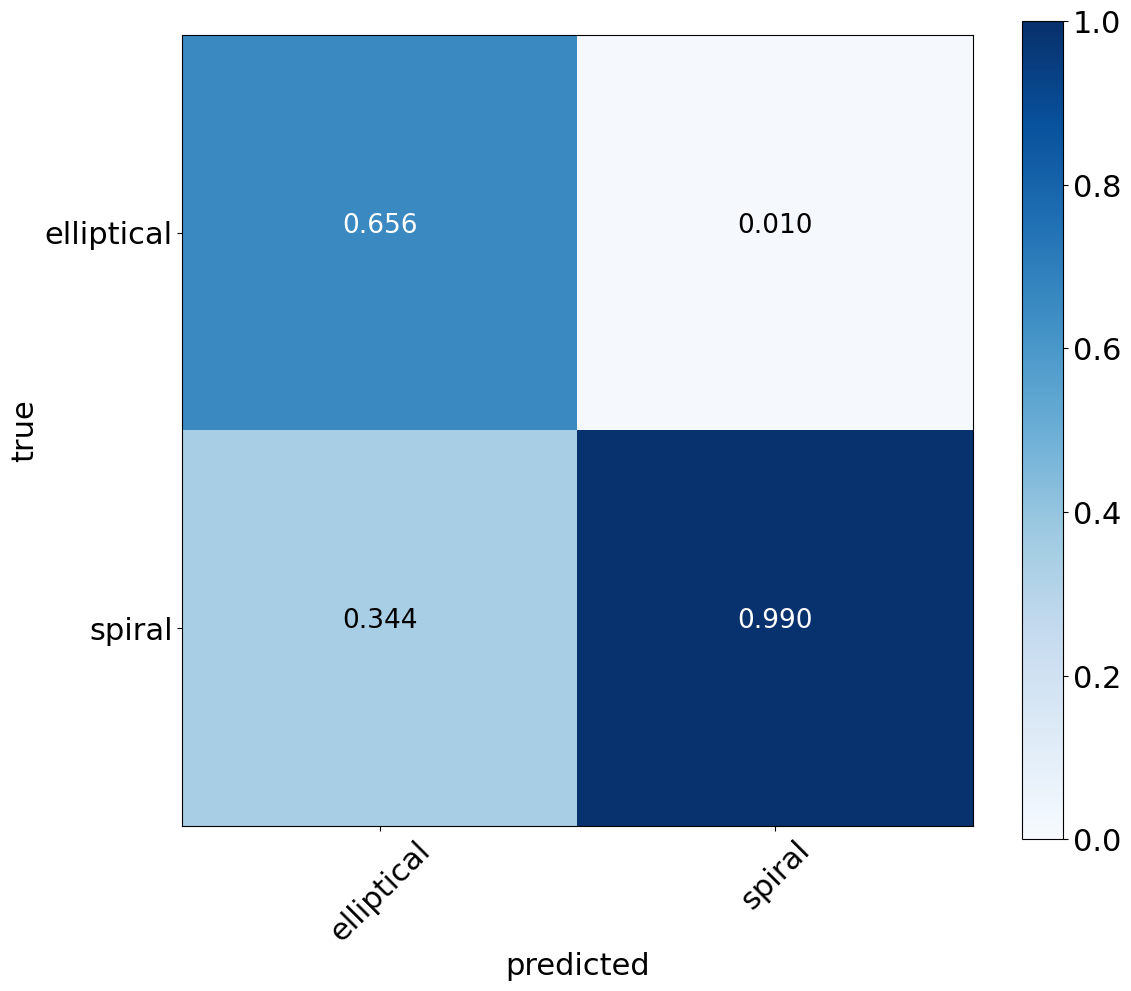

In [14]:
plot_confusion_matrix(df_qm['trueLabels'], df_qm['predictedLabels'], normalize_by_yPredicted=True)


[[0.66509434 0.01015228]
 [0.33490566 0.98984772]]


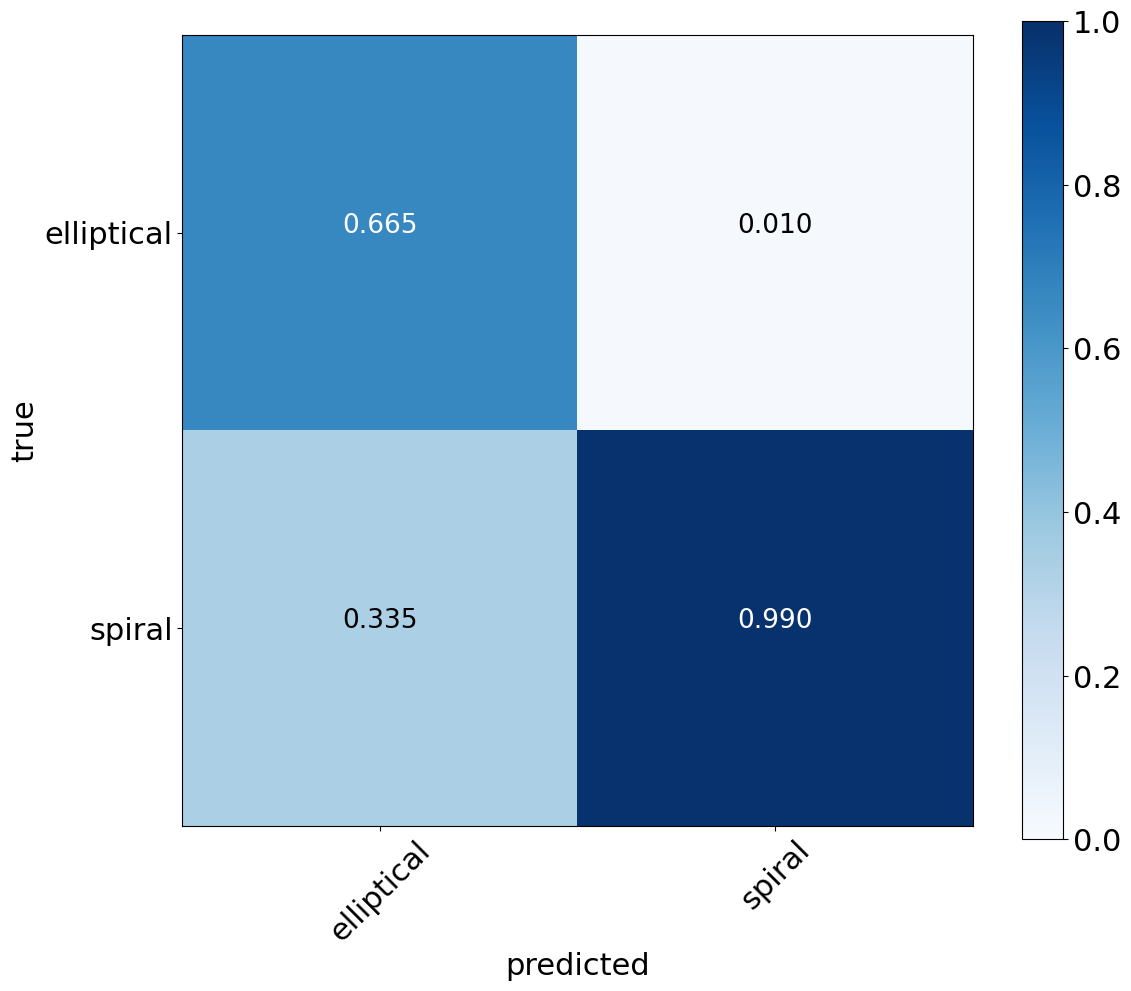

In [15]:
plot_confusion_matrix(df_cl['trueLabels'], df_cl['predictedLabels'], normalize_by_yPredicted=True)


# Plot scores

In [5]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score


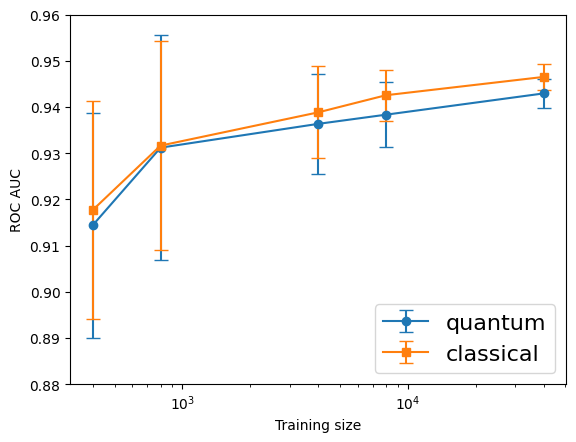

In [28]:
##########################
#!!!!CHOOOSE SCORE FIRST!!!!!!!!!
##########################
score = 'roc' #'fOne','precision', 'recall', 'roc', 'accuracy', 'accuracy_balanced'
#totalSizes = [100, 500, 1000, 5000, 10000, 50000]
totalSizes = [500, 1000, 5000, 10000, 50000]
kernels = ['quantum', 'classical']      
k_value = 5
score_qm_mean = []
score_qm_std = []
score_cl_mean = []
score_cl_std = []
for totalSize in totalSizes:
    score_values_qm = []
    score_values_cl = []
    for foldIdx in range(5):        
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'                
        df_qm = pd.read_pickle(path_quant.format(foldIdx))
        df_cl = pd.read_pickle(path_class.format(foldIdx))
        if score=='accuracy':
            score_values_qm.append(accuracy_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(accuracy_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Accuracy'
        elif score=='roc':
            score_values_qm.append(roc_auc_score(df_qm['trueLabels'], df_qm['scores']))
            score_values_cl.append(roc_auc_score(df_cl['trueLabels'], df_cl['scores']))
            ylabel='ROC AUC'
        elif score=='accuracy_balanced':
            score_values_qm.append(balanced_accuracy_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(balanced_accuracy_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Balanced accuracy'
        elif score=='precision':
            score_values_qm.append(precision_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(precision_score(df_cl['trueLabels'], df_cl['predictedLabels']))  
            ylabel='Precision'
        elif score=='recall':
            score_values_qm.append(recall_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(recall_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Recall'
        elif score=='fOne':
            score_values_qm.append(f1_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(f1_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='f1 score'
        else:
            raise ValueError('Choose a metric first!')
    score_qm_mean.append(np.mean(score_values_qm))
    score_qm_std.append(np.std(score_values_qm))
    score_cl_mean.append(np.mean(score_values_cl))
    score_cl_std.append(np.std(score_values_cl))

trainSizes = np.array([x*4/5 for x in totalSizes])
plt.errorbar(trainSizes, score_qm_mean, yerr=score_qm_std, label='quantum', marker='o', markersize=6, linewidth=1.5, capsize=5)
plt.errorbar(trainSizes, score_cl_mean, yerr=score_cl_std, label='classical', marker='s', markersize=6, linewidth=1.5, capsize=5)
plt.xscale('log')
plt.ylim(0.88,0.96)
plt.xlabel('Training size')
plt.ylabel(ylabel)
plt.legend(loc=4, prop={'size': 16})
plt.show()    
    

In [15]:
print(score_qm_mean[-1], score_qm_std[-1])

0.9743383677986506 0.001937538852168611


In [16]:
print(score_cl_mean[-1], score_cl_std[-1])

0.9756501588669153 0.00188360260639621


In [17]:
#print(accuracy_score(df_qm['trueLabels'], df_qm['predictedLabels']))

# Plot vs k


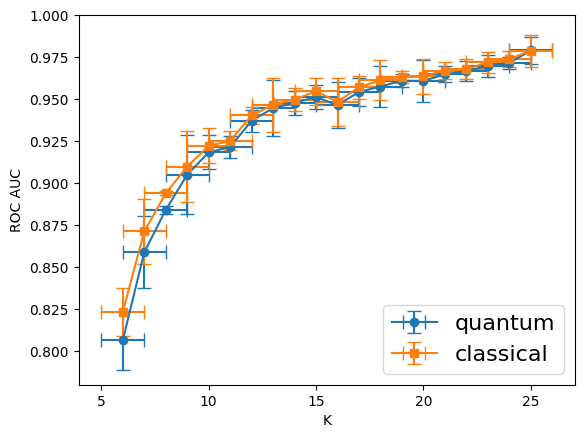

In [70]:
##########################
#!!!!CHOOOSE SCORE FIRST!!!!!!!!!
##########################
score = 'roc' #'fOne','precision', 'recall', 'roc', 'accuracy', 'accuracy_balanced'
totalSize = 50000
kernels = ['quantum', 'classical']      
k_value = 5
score_qm_mean = {}
score_qm_std = {}
score_cl_mean = {}
score_cl_std = {}
for j in range(5,25):
    if j>=10:
        k_value = 10
    if j>=20:
        k_value = 20
    score_values_qm = []
    score_values_cl = []
    for foldIdx in range(5):        
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'                
        df_qm = pd.read_pickle(path_quant.format(foldIdx))
        df_qm = df_qm[(df_qm['K']>j+0.5)&(df_qm['K']<j+1.5)]
        df_cl = pd.read_pickle(path_class.format(foldIdx))
        df_cl = df_cl[(df_cl['K']>j+0.5)&(df_cl['K']<j+1.5)]
        if score=='accuracy':
            score_values_qm.append(accuracy_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(accuracy_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Accuracy'
        elif score=='roc':
            score_values_qm.append(roc_auc_score(df_qm['trueLabels'], df_qm['scores']))
            score_values_cl.append(roc_auc_score(df_cl['trueLabels'], df_cl['scores']))
            ylabel='ROC AUC'
        elif score=='accuracy_balanced':
            score_values_qm.append(balanced_accuracy_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(balanced_accuracy_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Balanced accuracy'
        elif score=='precision':
            score_values_qm.append(precision_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(precision_score(df_cl['trueLabels'], df_cl['predictedLabels']))  
            ylabel='Precision'
        elif score=='recall':
            score_values_qm.append(recall_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(recall_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Recall'
        else:
            raise ValueError('Choose a metric first!')
    score_qm_mean[j+1] = np.mean(score_values_qm)
    score_qm_std[j+1] = np.std(score_values_qm)
    score_cl_mean[j+1] = np.mean(score_values_cl)
    score_cl_std[j+1] = np.std(score_values_cl)

plt.errorbar(list(score_qm_mean.keys()), list(score_qm_mean.values()), xerr=1, yerr=list(score_qm_std.values()), label='quantum', marker='o', markersize=6, linewidth=1.5, capsize=5)
plt.errorbar(list(score_cl_mean.keys()), list(score_cl_mean.values()), xerr=1, yerr=list(score_cl_std.values()), label='classical', marker='s', markersize=6, linewidth=1.5, capsize=5)
plt.ylim(0.78,1)
plt.xlabel('K')
plt.ylabel(ylabel)
plt.legend(loc=4, prop={'size': 16})
plt.show()    
    

# Plot vs others

<AxesSubplot: >

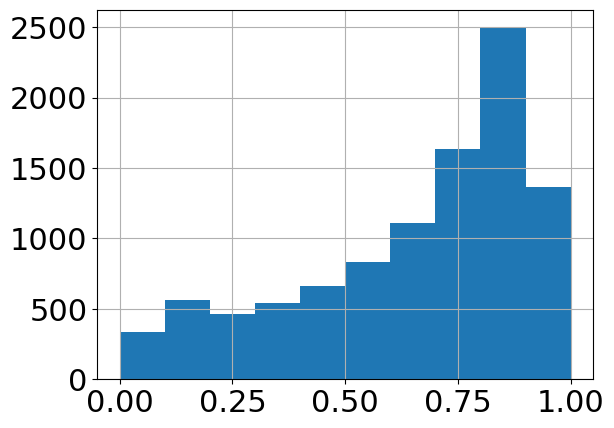

In [248]:
totalSize = 50000
k_value=5
path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
df_qm = pd.read_pickle(path_quant.format(foldIdx))
df_qm['G2'].hist()

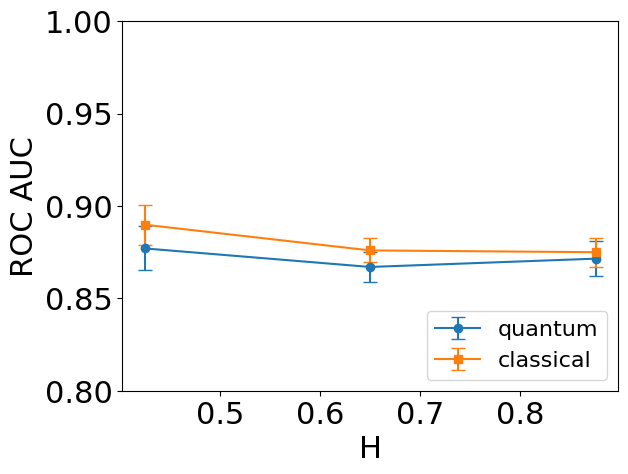

In [247]:
##########################
#!!!!CHOOOSE SCORE FIRST!!!!!!!!!
##########################
score = 'roc' #'precision', 'recall', 'roc', 'accuracy', 'accuracy_balanced'
variable = 'H'#'C', 'A', 'S', 'H', 'G2' other variables

if variable =='C':
    intervals = [(0.2,0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7)]
if variable =='A':
    intervals = [(0.6, 0.8), (0.8, 0.9), (0.9, 1)]
if variable =='S':
    intervals = [(0.25, 0.75), (0.75, 0.9), (0.9, 1)]
if variable =='H':
    intervals = [(0.3, 0.55), (0.55, 0.75), (0.75, 1)]
totalSize = 50000
kernels = ['quantum', 'classical']      
k_value = 5
score_qm_mean = {}
score_qm_std = {}
score_cl_mean = {}
score_cl_std = {}
for j in intervals:
    score_values_qm = []
    score_values_cl = []
    for foldIdx in range(5):        
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'                
        df_qm = pd.read_pickle(path_quant.format(foldIdx))
        df_qm = df_qm[(df_qm[variable]>j[0])&(df_qm[variable]<j[1])]
        df_cl = pd.read_pickle(path_class.format(foldIdx))
        df_cl = df_cl[(df_cl[variable]>j[0])&(df_cl[variable]<j[1])]
        if score=='accuracy':
            score_values_qm.append(accuracy_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(accuracy_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Accuracy'
        elif score=='roc':
            score_values_qm.append(roc_auc_score(df_qm['trueLabels'], df_qm['scores']))
            score_values_cl.append(roc_auc_score(df_cl['trueLabels'], df_cl['scores']))
            ylabel='ROC AUC'
        elif score=='accuracy_balanced':
            score_values_qm.append(balanced_accuracy_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(balanced_accuracy_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Balanced accuracy'
        elif score=='precision':
            score_values_qm.append(precision_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(precision_score(df_cl['trueLabels'], df_cl['predictedLabels']))  
            ylabel='Precision'
        elif score=='recall':
            score_values_qm.append(recall_score(df_qm['trueLabels'], df_qm['predictedLabels']))
            score_values_cl.append(recall_score(df_cl['trueLabels'], df_cl['predictedLabels']))
            ylabel='Recall'
        else:
            raise ValueError('Choose a metric first!')
    score_qm_mean[np.mean(j)] = np.mean(score_values_qm)
    score_qm_std[np.mean(j)] = np.std(score_values_qm)
    score_cl_mean[np.mean(j)] = np.mean(score_values_cl)
    score_cl_std[np.mean(j)] = np.std(score_values_cl)

plt.errorbar(list(score_qm_mean.keys()), list(score_qm_mean.values()), yerr=list(score_qm_std.values()), label='quantum', marker='o', markersize=6, linewidth=1.5, capsize=5)
plt.errorbar(list(score_cl_mean.keys()), list(score_cl_mean.values()), yerr=list(score_cl_std.values()), label='classical', marker='s', markersize=6, linewidth=1.5, capsize=5)
plt.ylim(0.8,1)
plt.xlabel(variable)
plt.ylabel(ylabel)
plt.legend(loc=4, prop={'size': 16})
plt.show()    
    

# Plot t-type

In [26]:
def hist_features(df, feature='TType', density=True):    
    bins=40
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))    

    axs.hist(df[df['predictedLabels']==1][feature], bins, density=density, histtype=u'step', label='spiral')
    axs.hist(df[df['predictedLabels']==0][feature], bins, density=density, histtype=u'step', label='elliptical')
    #axs.hist(df[df['trueLabels']==1][feature], bins, density=density, histtype=u'step', label='spiral')
    #axs.hist(df[df['trueLabels']==0][feature], bins, density=density, histtype=u'step', label='elliptical')
    plt.xlabel(feature)
    axs.legend()
    leg = axs.legend(loc='best',bbox_to_anchor=(0, 0, 1, 0.9))
    plt.show()

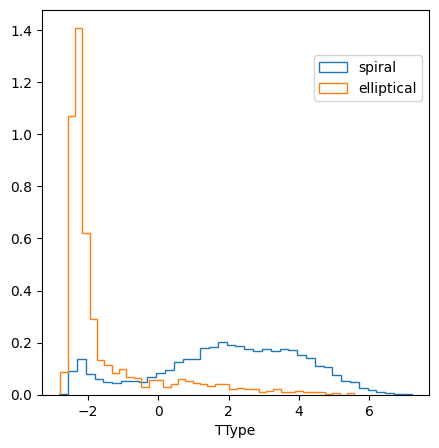

--------------------------------------------------------------------------------


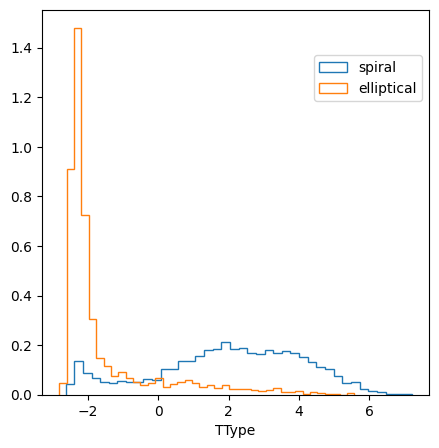

In [27]:
totalSizes = [50000]
k_value = 5
for totalSize in totalSizes:
    for foldIdx in range(5):        
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'                
        df_qm = pd.read_pickle(path_quant.format(foldIdx))
        df_cl = pd.read_pickle(path_class.format(foldIdx))
hist_features(df_qm) # this is for fold 5 now!!!!! # DISTRIBUTIONS ARE NOT NORMALIZED
print('-'*80)
hist_features(df_cl)

# Plot score

In [46]:
def hist_features2(df_qm, df_cl, feature='TType', density=True):    
    bins=50
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))    

    axs.hist(df_qm[df_qm['trueLabels']==1][feature], bins, density=density, histtype=u'step', label='spiral-qm')
    axs.hist(df_qm[df_qm['trueLabels']==0][feature], bins, density=density, histtype=u'step', label='elliptical-qm')
    axs.hist(df_cl[df_cl['trueLabels']==1][feature], bins, density=density, histtype=u'step', label='spiral-cl')
    axs.hist(df_cl[df_cl['trueLabels']==0][feature], bins, density=density, histtype=u'step', label='elliptical-cl')
    plt.xlabel(feature)
    axs.legend()
    leg = axs.legend(loc='best',bbox_to_anchor=(0, 0, 1, 0.9))
    plt.show()

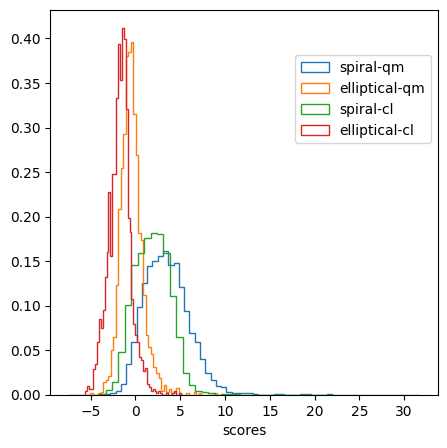

In [47]:
totalSizes = [50000]
k_value = 5
for totalSize in totalSizes:
    for foldIdx in range(5):        
        path_quant = 'output/result_Quant-alpha0p05-C500-dataMapFuncNone-interactionZandYZ-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'
        path_class = 'output/result_Class-C100-gammaauto-weightBalanced-trainSize'+str(int(4*totalSize/5))+'-testSize'+str(int(totalSize/5))+'-foldIdx{}-minOfK'+str(k_value)+'.pkl'                
        df_qm = pd.read_pickle(path_quant.format(foldIdx))
hist_features2(df_qm, df_cl, feature='scores', density=True) # this is for fold 5 now!!!!! # DISTRIBUTIONS ARE NOT NORMALIZED
